In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir

%matplotlib inline

In [2]:
samples = list(
    filter(
        lambda f: f.endswith("jpg"),
        listdir("data/")
    )
)

sample_masks = pd.read_csv('data/sample_ship_segmentations.csv')
sample_masks.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
2,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...
3,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...
4,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...


In [3]:
def rle_decode(mask_rle, shape=(768,768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    # s[0:][::2] get pixels array; s[1:][::2] get lengths array
    starts -= 1
    ends = starts + lengths
    mask = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        mask[lo:hi] = 1
    return mask.reshape(shape).T # Needed to align to RLE direction

In [9]:
def show_sample_seg(img_id, encoded_masks):
    img = mpimg.imread('data/' + img_id)
    img_masks = encoded_masks.loc[encoded_masks['ImageId'] == img_id, 'EncodedPixels'].tolist()
    all_masks = np.zeros((768,768))
    
    for mask in img_masks:
        all_masks += rle_decode(mask)
    
    fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].set_title('Original')
    axarr[1].set_title('Mask')
    axarr[2].set_title('Segmentation')
    axarr[0].imshow(img)
    axarr[1].imshow(all_masks)
    axarr[2].imshow(img)
    axarr[2].imshow(all_masks, alpha=0.4)
    plt.tight_layout(h_pad=0.1, w_pad=0.1)
    plt.show()

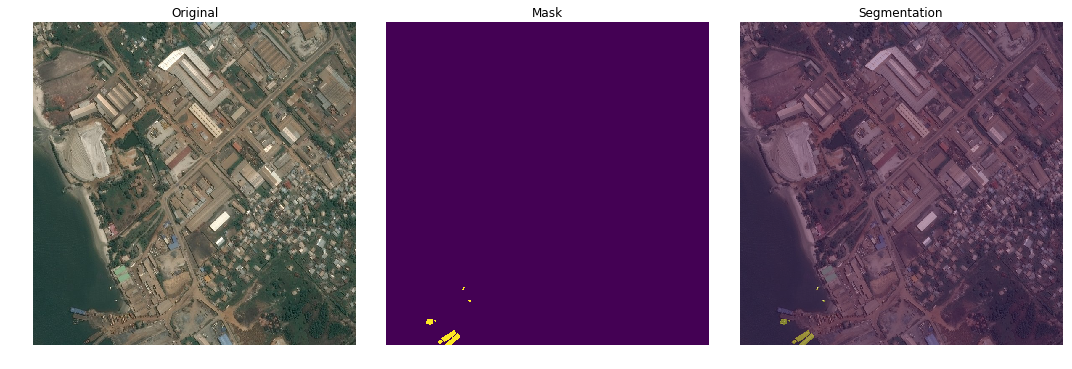

In [10]:
show_sample_seg(samples[5], sample_masks)

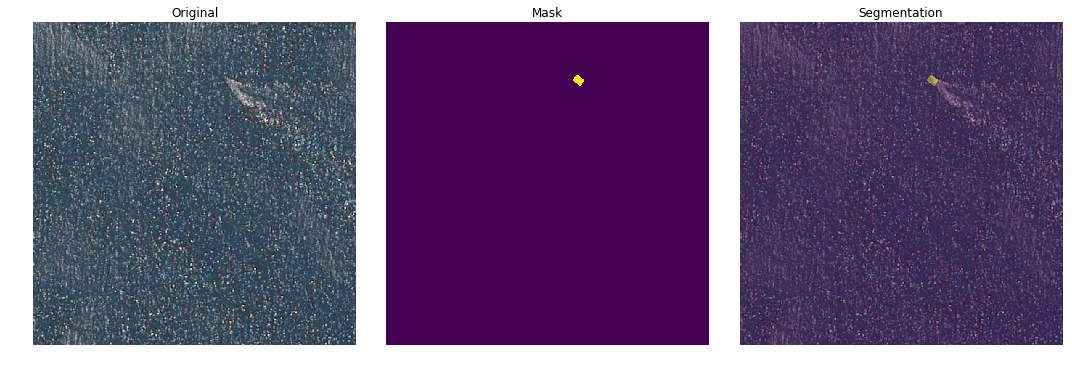

In [11]:
show_sample_seg(samples[-1], sample_masks)